# 1. Detecting Univariate Outliers

This chapter covers techniques to detect outliers in 1-dimensional data using histograms, scatterplots, box plots, z-scores, and modified z-scores.

## 1.1 Import Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Z-Score
from scipy.stats import zscore

# MAD
from scipy.stats import median_abs_deviation
from pyod.models.mad import MAD

## 1.2 User Variables

In [26]:
airbnb_df = pd.read_csv("../datasets/airbnb.csv")
airbnb_df.head(2)

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,3,12,1.08,1,316,595
1,20,31,0.98,1,0,99


# 2. Exercises

## 2.1 Print a 5-number summary

### Description

One of the quickest methods for getting a feel for new data is the 5-number summary. It prints out 5 metrics about a distribution - the minimum, 25th percentile, median, 75th percentile, and the maximum along with mean and standard deviation. By looking at the 5-number summary and the difference between the mean and the minimum/maximum values, you can get a rough idea of whether outliers are present in the distribution.

In the exercises of this chapter, you will be using the methods discussed in the videos to detect the prices of the most expensive (or inexpensive) US Airbnb listings. The dataset has been loaded as ``airbnb_df`` as a pandas DataFrame.

### Instructions

* Extract the ``price`` column into ``prices`` from the US Airbnb Listings data.
* Print the 5-number summary of the ``prices`` distribution.

In [27]:
airbnb_df.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,3,12,1.08,1,316,595
1,20,31,0.98,1,0,99
2,15,4,0.28,1,365,45
3,7,5,0.10,1,356,350
4,3,58,1.65,3,55,28


In [28]:
# Extract price
prices = airbnb_df["price"]

# Print 5-number summary
print(prices.describe())

count    10000.000000
mean       181.589100
std        371.085721
min          0.000000
25%         75.000000
50%        116.000000
75%        196.000000
max      10000.000000
Name: price, dtype: float64


Use the ``.describe()`` method whenever you encounter a new distribution to get a feel for the presence of outliers.

## 2.2 Histograms for outlier detection

### Description

A histogram can be a compelling visual for finding outliers. They can become apparent when an appropriate number of bins is chosen for the histogram. Recall that the square root of the number of observations can be used as a rule of thumb for setting the number of bins. 

<b>Usually, the bins with the lowest heights will contain outliers.</b>

In this exercise, you'll plot the histogram of ``prices`` from the previous exercise. ``numpy`` and ``matplotlib.pyplot`` are available under their standard aliases.

### Instructions

* Find the square root of the length of ``prices`` and store it as ``n_bins``.
* Cast ``n_bins`` to an integer.
* Create a histogram of ``prices``, setting the number of bins to ``n_bins``.

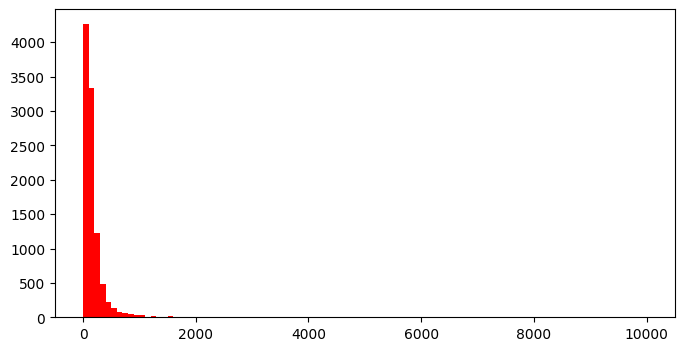

In [29]:
# Find the square root of the length of prices
n_bins = len(prices)**0.5

# Cast to an integer
n_bins = int(n_bins)

plt.figure(figsize=(8, 4))

# Create a histogram
plt.hist(prices, bins=n_bins, color='red')
plt.show()

Notice the low bars from 1500 to 1800 in the x-axis. Also, even though they are not visible, there must be some bars with almost 0 height to the far right of the histogram. Otherwise, it wouldn't be this wide.

## 2.3 Scatterplots for outlier detection

### Description

A scatterplot is another handy method to identify outliers visually. Although it is usually used to plot two variables against each other to inspect their relationship, using the trick from the video, you can plot a scatterplot with only one variable to make the outliers stand out.

``matplotlib.pyplot`` is loaded as ``plt``. The data is available as ``prices``.

### Instructions

* Create a list of consecutive integers with the same length as ``prices``.
* Create a scatterplot with ``integers`` on the x-axis and ``prices`` on the y-axis.

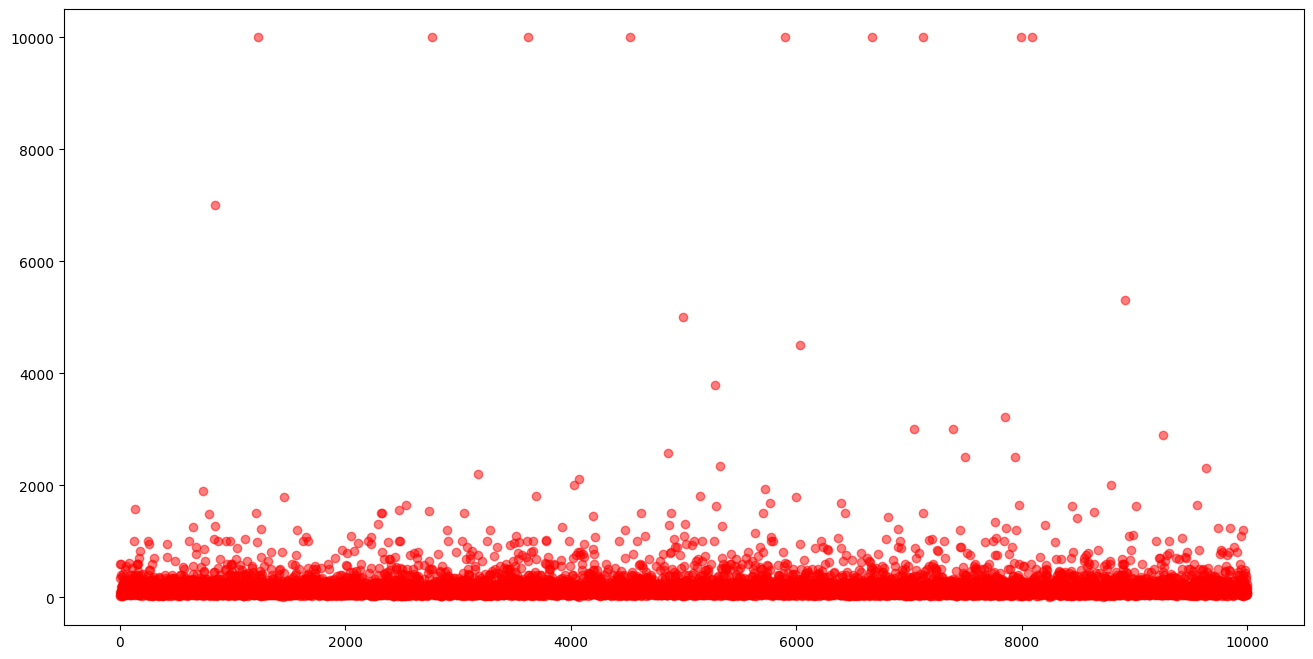

In [30]:
# Create a list of consecutive integers
integers = range(len(prices))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,prices, c='red', alpha=0.5)
plt.show()

Splendid! Notice how you can draw similar conclusions from the scatterplot. Like in the histogram, the cloud of dots become much sparser as you go up from the 1500-1800 mark in the y-axis.

## 2.4 Boxplots for outlier detection

### Description

In this exercise, you will get a feel of what the US Airbnb Listings ``prices`` data looks like using boxplots. This will enable you to assess the range of the distribution where inliers lie. You will also get a sense of custom versus default parameters for setting whisker lengths to classify outliers.

``matplotlib.pyplot`` has been loaded as ``plt`` and the data is available as ``prices``.

### Instructions

* Create a boxplot of the ``prices`` distribution.
* Create a boxplot with a multiplying factor of ``5``.

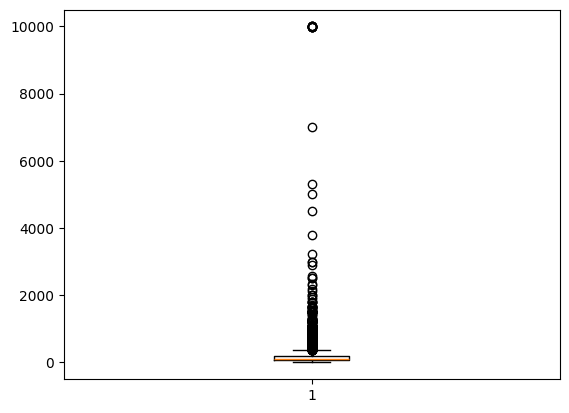

In [31]:
# Create a boxplot of prices
plt.boxplot(prices)
plt.show()

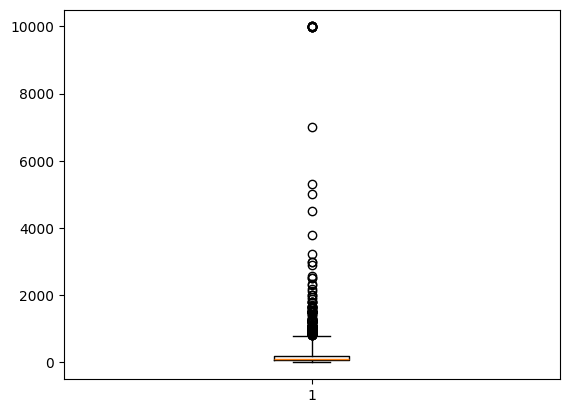

In [32]:
# Create a boxplot with custom whisker lengths
plt.boxplot(prices, whis=5)
plt.show()

Since the magnitude of the outliers in the distribution is higher than normal datapoints, the boxplots are squished into the bottom. But, you could make the whiskers longer by using a larger multiplying factor.

## 2.5 Calculating outlier limits with IQR

### Description

Visualizing outliers is usually only the first step in detecting outliers. To go beyond visualizing outliers, you will need to write code that isolates the outliers from the distribution.

In this exercise, you will implement the first step of what's going on under the hood of the boxplot. In other words, you will calculate the lower and upper outlier limits manually.

The distribution is available as ``prices``.

### Instructions

* Calculate the first and third quartiles of ``prices`` and store these as ``q1`` and ``q3``, respectively.
* Calculate the IQR score into ``IQR``. 
* Calculate the lower outlier limit into ``lower_limit``.
* Calculate the upper outlier limit into ``upper_limit``.

### Notes

* The ``25th quartile`` (also called the first quartile, Q1) is the value below which 25% of the data falls.
* The ``75th quartile`` (third quartile, Q3) is the value below which 75% of the data falls.
* Q1 and Q3 help define the "middle 50%" of data, useful for understanding the spread and typical values in a dataset.

### Calculations

![Quantile Calculation](../images/quantile_calculation.png)
![IQR Calculation](../images/iqr_calculation.png)

In [33]:
# Calculate the 25th and 75th percentiles
q1 = prices.quantile(0.25)
q3 = prices.quantile(0.75)

# Find the IQR
IQR = q3 - q1
factor = 2.5

# Calculate the lower limit
lower_limit = q1 - (IQR * factor)

# Calculate the upper limit
upper_limit = q3 + (IQR * factor)

In [34]:
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {IQR}")

Q1: 75.0
Q3: 196.0
IQR: 121.0


## 2.6 Using outlier limits for filtering

### Description

In the previous exercise, you found the limits you will use for categorizing outliers. In this exercise, you'll apply them to the ``prices`` distribution to isolate the outliers.

The ``prices``, ``lower_limit``, and ``upper_limit`` variables are available from the last exercise.

### Instructions

* Create a boolean mask named ``is_lower`` that checks if the values of ``prices`` are less than ``lower_limit``.
* Create a boolean mask named ``is_higher`` that checks if the values of ``prices`` are greater than ``upper_limit``.
* Combine the masks and use boolean subsetting to filter for outliers.
* Print the number of outliers found.

In [38]:
# Calculate the 25th and 75th percentiles
q1 = prices.quantile(0.25)
q3 = prices.quantile(0.75)

# Find the IQR
IQR = q3 - q1
factor = 5 # Factor changed for this exercise

# Calculate the lower limit
lower_limit = q1 - (IQR * factor)

# Calculate the upper limit
upper_limit = q3 + (IQR * factor)

In [39]:
# Create a mask for values lower than lower_limit
is_lower = prices < lower_limit

# Create a mask for values higher than upper_limit
is_higher = prices > upper_limit

# Combine the masks to filter for outliers
outliers = prices[is_lower | is_higher]

# Count and print the number of outliers
print(outliers)

124     1000
129     1571
179      832
252      999
254      950
        ... 
9836     809
9843    1245
9880     893
9940    1100
9965    1200
Name: price, Length: 181, dtype: int64


Using IQR and a factor of 5, we found 181 outliers out of 10k observations.

## 2.7 Finding outliers with z-scores

### Description

The normal distribution is ubiquitous in the natural world and is the most common distribution. This is why the z-score method can be one of the quickest methods for detecting outliers.

Recall the rule of thumb from the video: if a sample is more than three standard away deviations from the mean, you can consider it an extreme value.

However, recall also that the z-score method should be approached with caution. This method is appropriate only when we are confident our data comes from a normal distribution. Otherwise, the results might be misleading.

The ``prices`` distribution has been loaded for you.

### Instructions

* Import the ``zscore`` function from the relevant ``scipy`` module.
* Find the z-scores of ``prices`` and store them into ``scores``.
* Create a boolean mask named ``is_over_3`` to check if the absolute values of ``scores`` are greater than 3.
* Use the mask to filter ``prices`` for outliers.

### Notes

* In anomaly detection, the z-score quantifies how far a data point is from the mean of the dataset in terms of standard deviations. 
* It is a statistical measure that helps identify whether a data point is an outlier or anomaly by showing how unusual or extreme the data point is relative to the overall distribution.

### Calculations

![Z-Score](../images/z_score.png)

In [41]:
# Import the zscores function
from scipy.stats import zscore

# Find the zscores of prices
scores = zscore(prices)

# Check if the absolute values of scores are over 3
is_over_3 = scores > 3

# Use the mask to subset prices
outliers = prices[is_over_3]

print(len(outliers))

61


You found 61 outliers from sales, but we found over 180 in the last exercise. This means you might have had some mislabeled data points in the last exercise because the ``prices`` distribution is not normally distributed.

## 2.8 Using modified z-scores with PyOD

### Description

It is time to unleash ``pyod`` on outliers. We use the ``MAD`` estimator from ``pyod`` to utilize modified z-scores. The estimator already uses the ``median_abs_deviation`` function under the hood, so it is unnecessary to repeat the previous steps.

The ``MAD`` estimator has already been loaded from ``pyod.models.mad`` and the data is available as ``prices``.

### Instructions

* Initialize ``MAD()`` with a threshold of ``3.5``.
* Reshape ``prices`` to make it 2D.
* Generate inlier/outlier labels on ``prices`` by fitting and predicting using ``mad`` simultaneously.
* Subset ``labels`` for outliers, which are denoted as 1.

### Notes

* The main differences between ``scipy.stats.median_abs_deviation`` and ``pyod.models.mad.MAD`` are their scope, usage context, and implementation details:

![MAD Comparison](../images/MAD_comparison.png)

In [45]:
# Initialize with a threshold of 3.5
mad = MAD(threshold=3.5)

# original price shape (1000,)

# Reshape prices to make it 2D
prices_reshaped = prices.values.reshape(-1, 1)

# new price shape (1000,1)

# Fit and predict outlier labels on prices_reshaped
labels = mad.fit_predict(prices_reshaped)

# Filter for outliers
outliers = prices[labels == 1]

print(len(outliers))

755


c:\Users\sanja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [46]:
print(f"Prices original shape: {prices.shape}")
print(f"Prices original shape: {prices_reshaped.shape}")

Prices original shape: (10000,)
Prices original shape: (10000, 1)


You've added two powerful algorithms to your univariate outlier detection arsenal. 

* Use ``z-scores`` when you have a normal distribution.
* If you doubt the distribution of your data, turn to <b>modified z-scores</b> with ``MAD``.